* ## Random variables and stochastic process 
* ###  Numerical examples for Lectures-1-3

In [4]:
#First let's load the libraries we will need 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import binom 

import seaborn as sns
from numpy.random import normal

plt.style.use('seaborn-white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Binomial distribution
We have learned about binomial expansion and porbability distribution functions. Let us apply our knowledge in practice and generate some binomial random numbers.

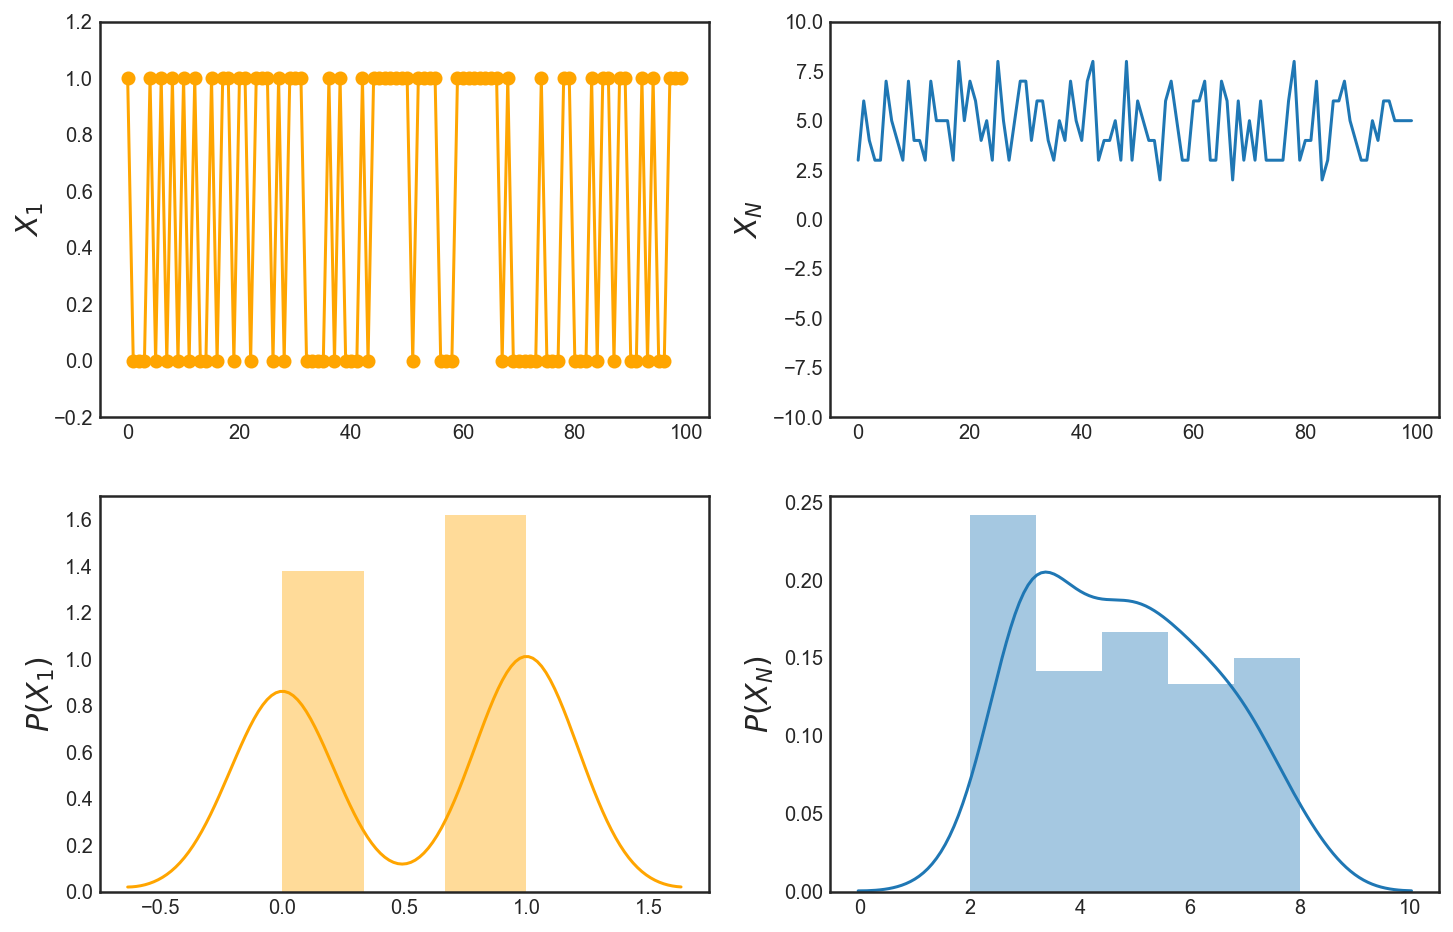

In [6]:
Nexp=100  # number of experiments,
N=10      # number of coin tosses in each experiment
q = 0.5   # probability of each trial 

# Compute s and XN
s=binom(1,q)    # Define random variable s: coin flip 1 time
s=s.rvs(Nexp)   # repeat experiment Nexp times 
#
XN=binom(N,q)   # Define random variable XN: coin flip N times
XN=XN.rvs(Nexp) # repeat experiment Nexp times 

###Plotting###
fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(12,8))
ax[0,0].plot(s,'-o',color='orange')
ax[0,1].plot(XN)
#
ax[0,0].set_ylabel(r'$X_1$',fontsize=15)
ax[0,1].set_ylabel(r'$X_N$',fontsize=15)
ax[0,0].set_ylim([-0.2,1.2])
ax[0,1].set_ylim([-N,N])
#
sns.distplot(s,ax=ax[1,0], color='orange')
sns.distplot(XN,ax=ax[1,1])
ax[1,0].set_ylabel(r'$P(X_1)$',fontsize=15)
ax[1,1].set_ylabel(r'$P(X_N)$',fontsize=15)

In [45]:
s =  binom(10, 0.5) # Declare X to be a binomial random variable
# Knowing probability distribution of X we can get all kinds of properties such as:
print(s.rvs(20))          # 10 random samples form X
print(s.pmf(5))           # P(X = 3)
print(s.cdf(4))           # P(X <= 4)
print(s.mean())           # E[X], mean
print(s.var())            # Var(X), variance
print(s.std())            # Std(X), standard deviation

[4 6 7 3 5 6 4 7 5 5 5 3 4 7 4 7 6 7 5 4]
0.24609375
0.376953125
5.0
2.5
1.58113883008


1

#### Brownian motion

We have learned about random variables and encorunetred a concept of stochastic process. Now let us generate the prootpypical stochasic process; brownian motion. Brownian motion was first discoverd by a botanist who noticed that a pollen in solution undergo erratic and incessant motion. $$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,dt)$$ 

CPU times: user 60.8 ms, sys: 2.52 ms, total: 63.4 ms
Wall time: 73.9 ms


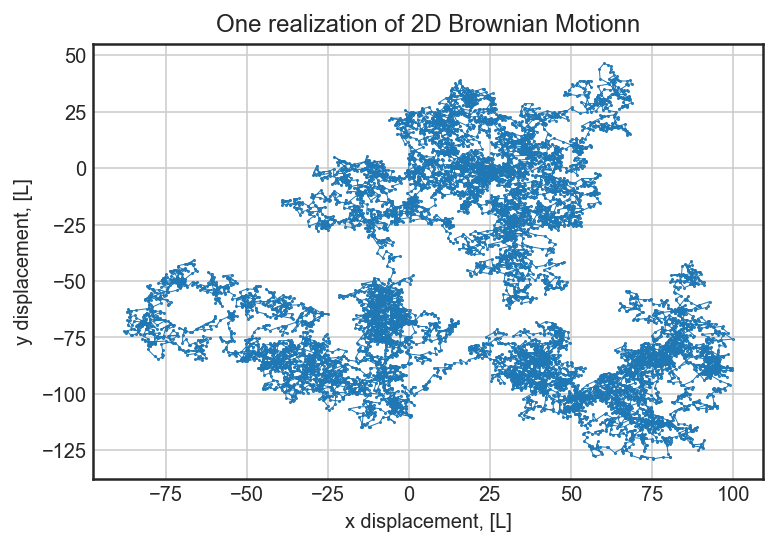

In [136]:
%%time
def brown2D(nT,D=1.0,dt=1.0):
    """ Generating Brownian displacements in 2 dimensions
    ----------
    nT:   number of time measurmenets
    Returns: displacements in x and y
    ------- """
    
    C = np.sqrt(2*D*dt)                    
    normDisX = C*np.random.normal(0, 1.0, nT)       #Draw random numbers normal distribution
    normDisY = C*np.random.normal(0, 1.0, nT)
    
    return np.cumsum(normDisX), np.cumsum(normDisY) # Sum up displacements over time

# Try changing length of time and see what happens
nT=10000
xDis, yDis = brown2D(nT)

fig,ax=plt.subplots(figsize=(6,4))
ax.plot(xDis, yDis,'-o',linewidth=0.5,ms=0.5)
ax.grid('on')
ax.set_title("One realization of 2D Brownian Motionn")
ax.set_xlabel("x displacement, [L]")
ax.set_ylabel("y displacement, [L]")

We expect the distribution of displacments $dx(dt, t_i)=x(t_i+dt)-x(t_i)$, for $i=1...N$ to be gaussian. Can you tell why?

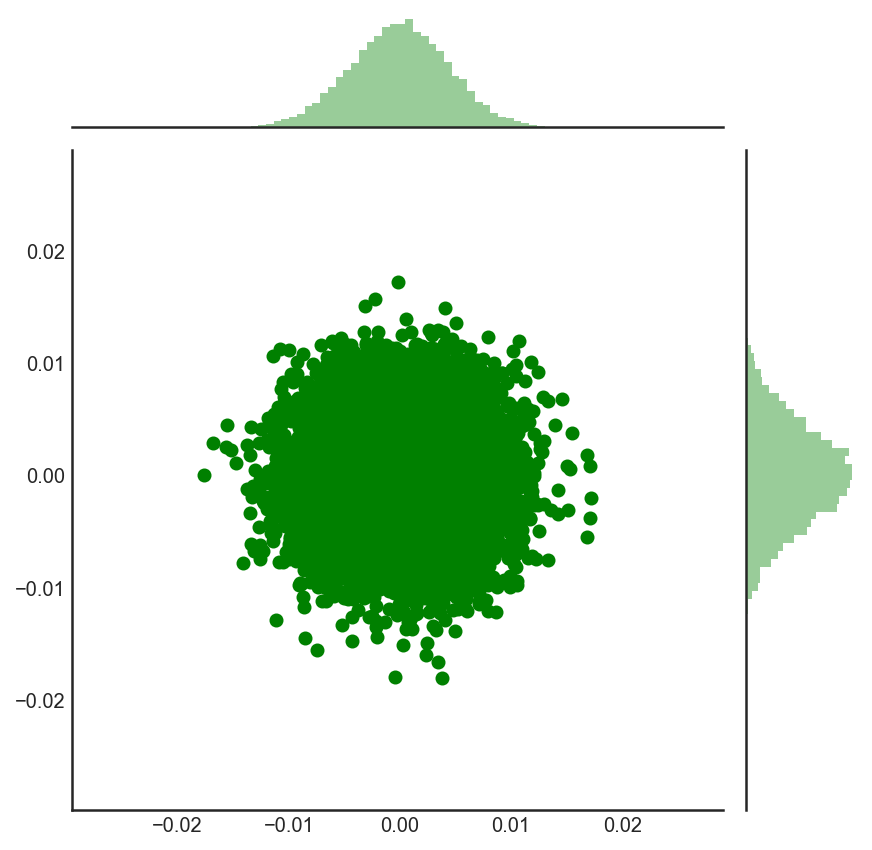

In [135]:
dx=np.ediff1d(xDis)  #We can also get dx and dy manually, e.g xDis[1::2]-xDis[0::2]
dy=np.ediff1d(yDis)
sns.jointplot(dx,dy,color='green')

In [42]:
x,y

([2, 9, 3], [2, 9, 3])

#### Large deviation functions and Law of Large numbers 


### --END--

In [13]:
# This part stays in the end and renders our markdown with beautiful style
from IPython.core.display import HTML
def set_css_style(css_file_path):
    styles = open(css_file_path, "r").read()
    return HTML(styles)
set_css_style('./common/custom.css')